In [20]:
#Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [21]:
#Import the dataset
df = pd.read_csv('datasets/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [22]:
#Encode String columns

label_encoder = LabelEncoder()

df['Area'] = label_encoder.fit_transform(df['Area'])
df['Item'] = label_encoder.fit_transform(df['Item'])

df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,0,1,1990,36613,1485.0,121.0,16.37
1,1,0,3,1990,66667,1485.0,121.0,16.37
2,2,0,4,1990,23333,1485.0,121.0,16.37
3,3,0,5,1990,12500,1485.0,121.0,16.37
4,4,0,6,1990,7000,1485.0,121.0,16.37


In [23]:
# Splitting data into features and target

y = df['hg/ha_yield']
X = df.drop(columns=['hg/ha_yield','Year','Unnamed: 0'])

X.head()

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1485.0,121.0,16.37
1,0,3,1485.0,121.0,16.37
2,0,4,1485.0,121.0,16.37
3,0,5,1485.0,121.0,16.37
4,0,6,1485.0,121.0,16.37


In [24]:
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7.800347967982968


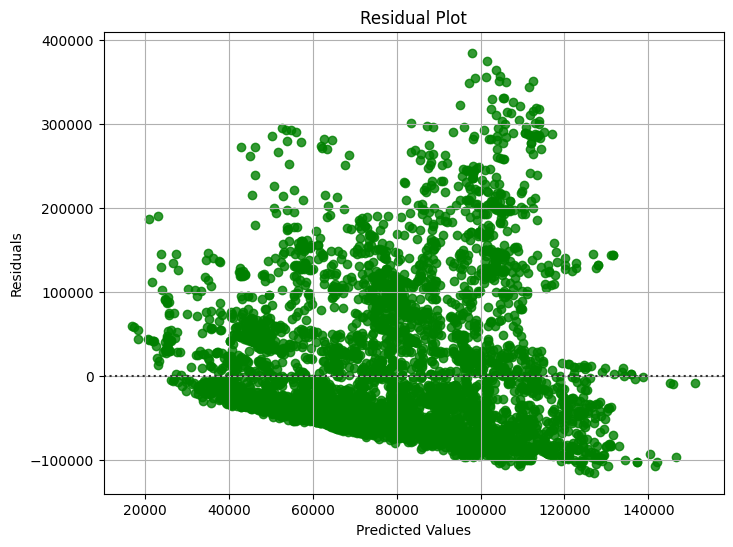

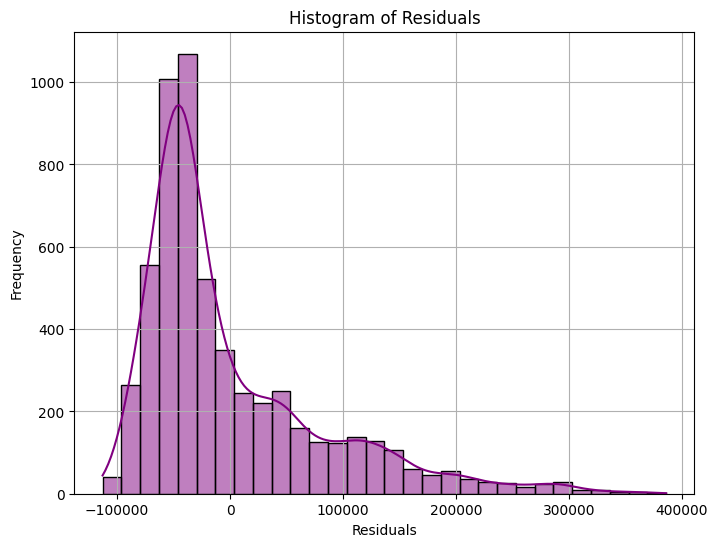

In [28]:
#Linear regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_score = lr_model.score(X_test,y_test)
print(lr_score * 100)

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

95.97010584328658


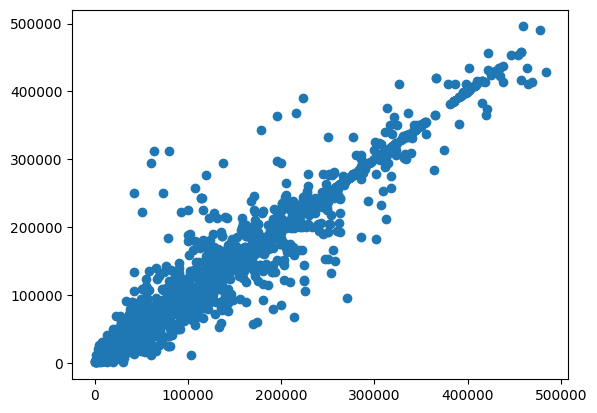

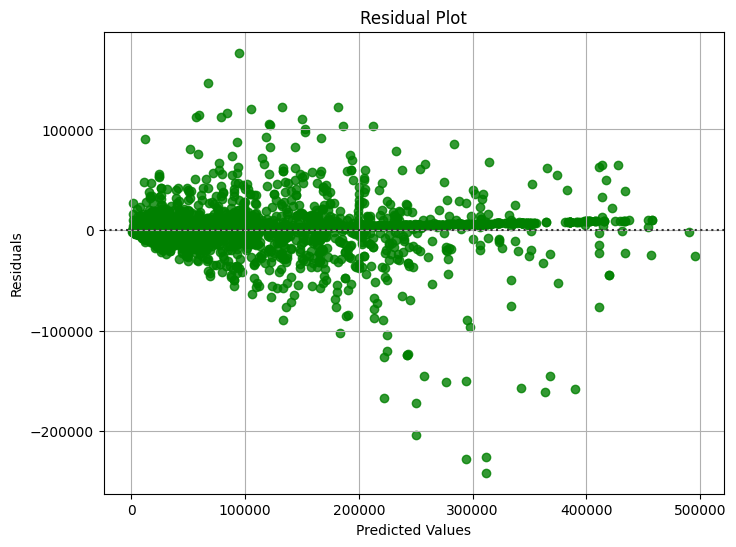

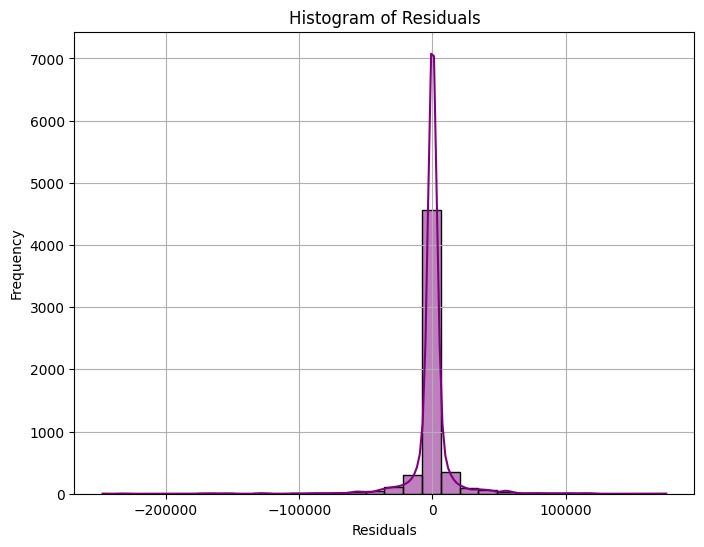

In [27]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)

y_pred = dtr_model.predict(X_test)

dtr_score = dtr_model.score(X_test,y_test)
print(dtr_score * 100)

plt.scatter(y_test,y_pred)
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

97.2908324279331


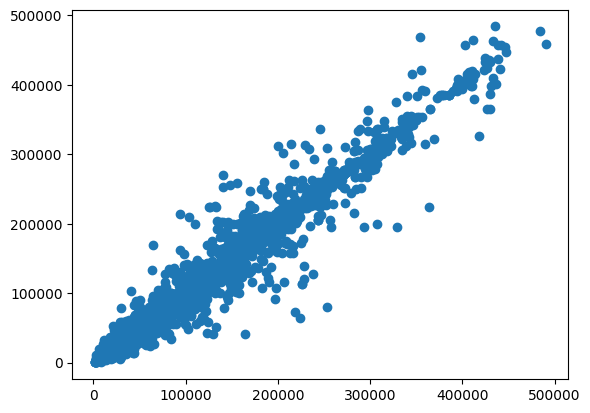

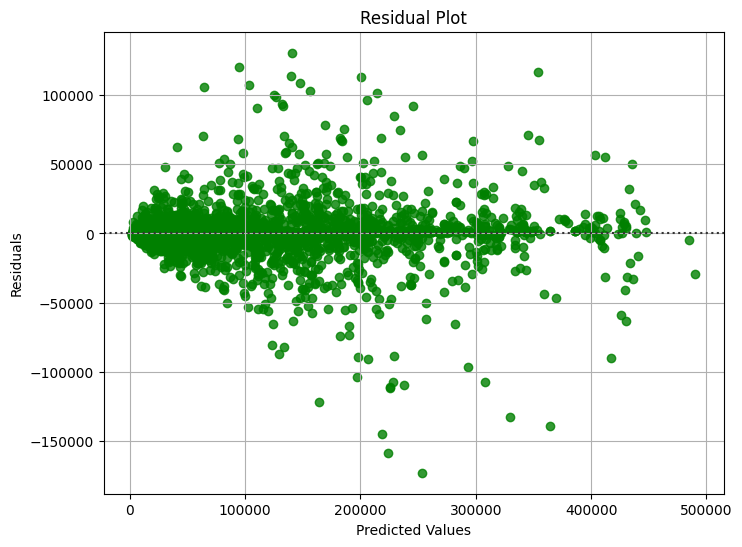

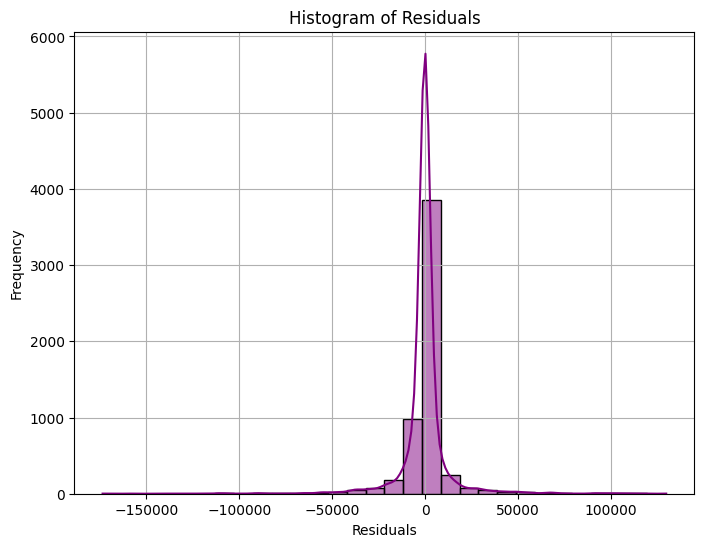

In [30]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rf_score = rf_model.score(X_test,y_test) * 100

print(rf_score)

plt.scatter(y_pred,y_test)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

97.2908324279331


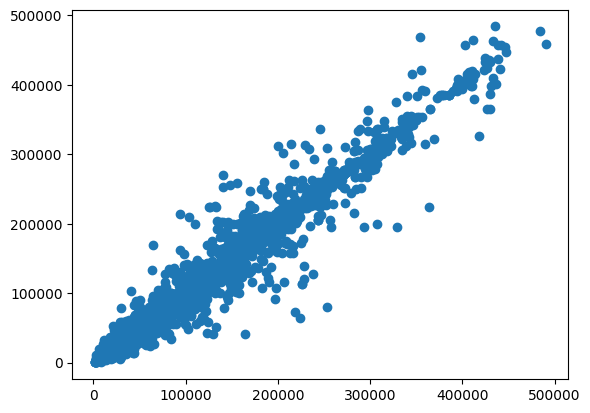

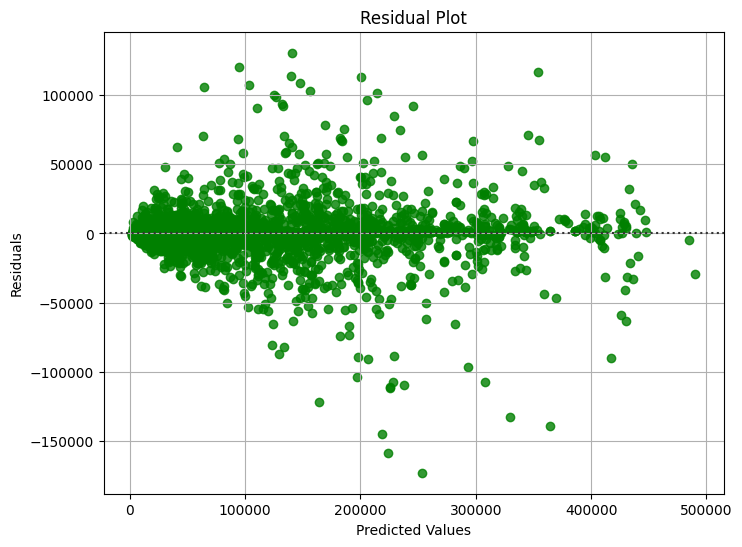

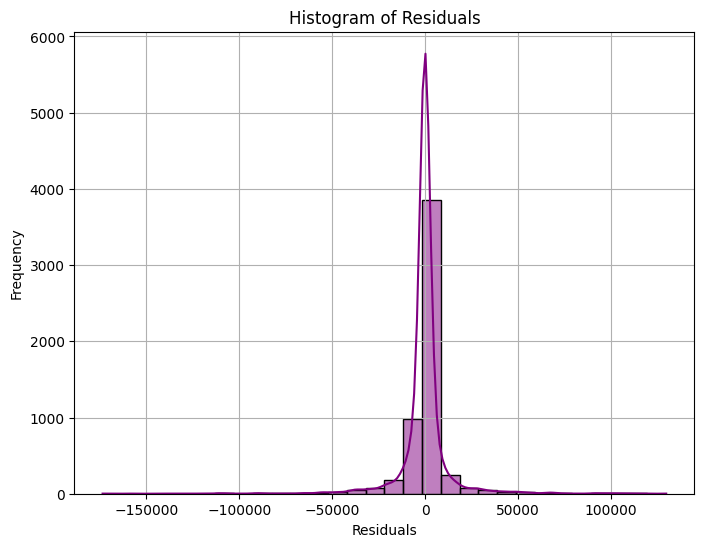

In [31]:
# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
nb_score = rf_model.score(X_test,y_test) * 100

print(nb_score)

plt.scatter(y_pred,y_test)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red'})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()